In [1]:
from argparse import Namespace

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns
import os
import io
import glob
import sklearn
import nilearn as nl
from sklearn.manifold import TSNE
from nilearn.masking import apply_mask
from nilearn.image import index_img
import re
from nilearn import masking
from nilearn.input_data import NiftiMasker
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [21]:
# participants = pd.read_csv('/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/train/train_labels/participants.tsv', sep="\t")  
path_quasi = '/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/train/train_quasiraw/train_quasiraw/'
path_vbm = '/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/train/train_vbm/'
# path_fsl = '/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/train/train_fsl/'
# path_roi = '/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/train/train_roi/'
# 

fpaths_quasi = glob.glob(os.path.join(path_quasi, "*quasiraw_T1w.npy"))
fpaths_vbm = glob.glob(os.path.join(path_vbm, "*cat12vbm_desc-gm_T1w.npy"))
# fpaths_fsl = glob.glob(os.path.join(path_fsl, "*freesurfer_desc-xhemi_T1w.npy"))
# fpaths_vbm_roi = glob.glob(os.path.join(path_roi, "*cat12vbm_desc-gm_ROI.npy"))
# fpaths_deskn_roi = glob.glob(os.path.join(path_roi, "*desikan_ROI.npy"))
# fpaths_destrx_roi = glob.glob(os.path.join(path_roi, "*destrieux_ROI.npy"))



In [ ]:
fpaths_vbm_roi = pd.DataFrame(fpaths_vbm_roi).sort_values(by=[0])
fpaths_deskn_roi = pd.DataFrame(fpaths_deskn_roi).sort_values(by=[0])
fpaths_destrx_roi = pd.DataFrame(fpaths_destrx_roi).sort_values(by=[0])
# fpaths_vbm = pd.DataFrame(fpaths_vbm).sort_values(by=[0])
# fpaths_fsl = pd.DataFrame(fpaths_fsl).sort_values(by=[0])
# fpaths_quasi = pd.DataFrame(fpaths_quasi).sort_values(by=[0])

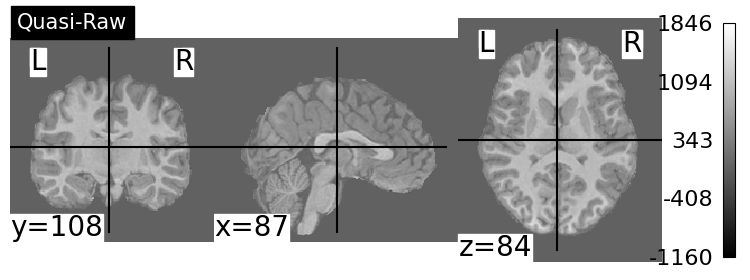

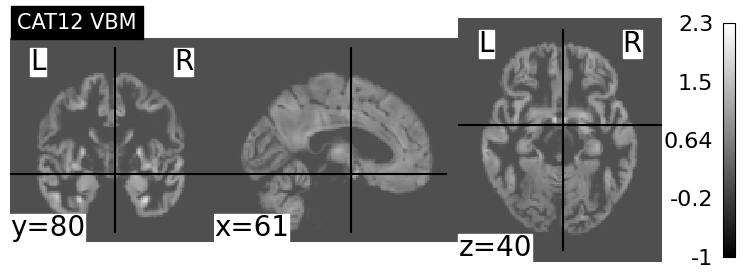

In [ ]:
# Plot the Quasi-Raw image by taking the numpy arr as input

# fig = plt.figure(figsize=(10,5))

Quasi_raw = np.load('/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/train/train_quasiraw/train_quasiraw/sub-105890017872_preproc-quasiraw_T1w.npy')
Quasi_raw = Quasi_raw.reshape(182,218,182)
Quasi_raw = nib.Nifti1Image(Quasi_raw, affine=np.eye(4))
plt.rcParams.update({'font.size': 16})


quasi_plot = plotting.plot_anat(Quasi_raw,  colorbar=True, title="Quasi-Raw", cbar_tick_format="%i",  black_bg=False)
quasi_plot.annotate(size=20)
quasi_plot.savefig("/media/dataanalyticlab/Drive2/MANSOOR/Figures/Quasi_raw_openbhb.png")



# # Plot the CAT12 VBM image

cat12_vbm = np.load('/media/dataanalyticlab/Drive2/MANSOOR/Dataset/OpenBHB/train/train_vbm/sub-105890017872_preproc-cat12vbm_desc-gm_T1w.npy')
cat12_vbm = cat12_vbm.reshape(121,145,121)
cat12_vbm = nib.Nifti1Image(cat12_vbm, affine=np.eye(4))


cat12_vbm_plot = plotting.plot_anat(cat12_vbm,  black_bg=False, annotate=False,  title="CAT12 VBM", colorbar=True)
cat12_vbm_plot.annotate(size=20)
cat12_vbm_plot.savefig("/media/dataanalyticlab/Drive2/MANSOOR/Figures/CAT12_vbm_openbhb.png")


